In [14]:
#real raw image data 
import matplotlib.pyplot as plt
import cv2
import matplotlib_inline

In [21]:
cat=cv2.imread('CATS_DOGS/train/CAT/10002.jpg')
#cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
#plt.imshow(cat4)



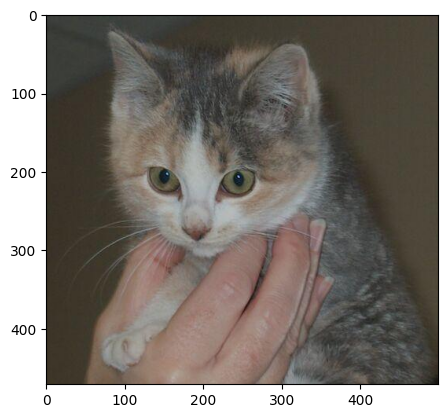

In [22]:
cat=cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

plt.imshow(cat)



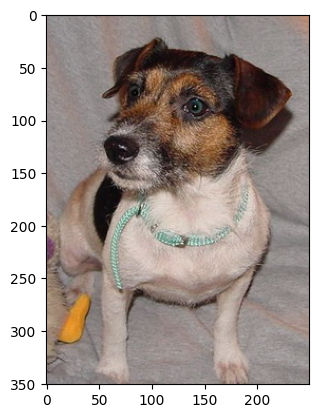

In [24]:
dog=cv2.imread('CATS_DOGS/train/DOGS/9374.jpg')
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)  #simple input channesls change 

dog.shape
plt.imshow(dog)



In [25]:
from keras.preprocessing.image import ImageDataGenerator


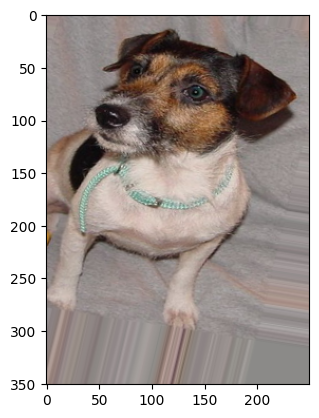

In [27]:
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest') # sirf horixtal me sglip karo ertical upside down dog nhi hota shear -->crop corners unwanted bg na aaye resize by expanding 
image_gen.random_transform(dog)
plt.imshow(image_gen.random_transform(dog))

In [28]:
image_gen.flow_from_directory('CATS_DOGS/train') #aply this to all


Found 1117 images belonging to 2 classes.


In [32]:
#now buitlding the model
from keras.models import Sequential

In [34]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPool2D

model=Sequential()
#play with filters
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#previous code me dense chala rha hai!!!
model.add(Dense(256,activation='relu'))

#model.add(Activation('relu'))
model.add(Dropout(0.5)) #helps overfitting neurons and turn off thse not required 0.5 50% off
model.add(Dense(1,activation='sigmoid'))
#model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary

NameError: name 'Dense' is not defined

In [35]:
batch_size=16
train_img_gen=image_gen.flow_from_dataframe('CATS_DOGS/train',target_size=(150,150),batch_size=batch_size,class_mode='binary')
test_img_gen=image_gen.flow_from_dataframe('CATS_DOGS/test',target_size=(150,150),batch_size=batch_size,class_mode='binary')


AttributeError: 'str' object has no attribute 'copy'

In [ ]:
results=model.fit_generator(train_img_gen,epochs=1,steps_per_epoch=150,validation_data=test_img_gen,validation_steps=12)



In [36]:
import warnings
warnings.filterwarnings('ignore')

result.history['acc']  #shows growing accuracy



In [ ]:
from keras.models import load_model
new_model=load_model('cat_dog_100epochs.h5')
dog_file='CATS_DOGS/test/DOGS/9374.jpg'  #just rept the following wth builin model to campre rsults 

model.predict(dog_file)

